In [1]:
"""
Indentifying images with and without animals via classification.Images with animals
are labeled and "positive", images without are labeled "negative".

Based on: 
    - https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

@Author: D. Barros
@Version: 1.0
"""

'\nIndentifying images with and without animals via classification.Images with animals\nare labeled and "positive", images without are labeled "negative".\n\nBased on: \n    - https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c\n\n@Author: D. Barros\n@Version: 1.0\n'

In [3]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

#path = "C:/Users/DBarros/Documents/SAFArI/Machine Learning tryouts/Datasets/Biota01 - positivo"
path = "M:\\Datasets\\Biota01 - positivos"
os.chdir(path)
print(os.getcwd())


M:\Datasets\Biota01 - positivos


In [ ]:
batch_size=32

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="train", batch_size=batch_size, target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test", batch_size=batch_size, target_size=(224,224))
prdata = ImageDataGenerator()
predictdata = predictdata.flow_from_directory(directory="predict", batch_size=batch_size,target_size=(224,224))

In [13]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [14]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 256)      

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=traindata.samples/batch_size,
                           generator=traindata,
                           validation_data= testdata,
                           validation_steps=testdata.samples/batch_size,
                           epochs=5,
                           callbacks=[checkpoint,early])
#hist2 = model.fit()

Epoch 1/5
 119/7716 [..............................] - ETA: 41:05:29 - loss: 39.0933 - accuracy: 0.5709

UnknownError:  OSError: image file is truncated (48 bytes not processed)
Traceback (most recent call last):

  File "C:\Users\Biota\anaconda3\envs\splinterML\lib\site-packages\tensorflow\python\ops\script_ops.py", line 244, in __call__
    ret = func(*args)

  File "C:\Users\Biota\anaconda3\envs\splinterML\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 302, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\Biota\anaconda3\envs\splinterML\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 827, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\Biota\anaconda3\envs\splinterML\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 814, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\Biota\anaconda3\envs\splinterML\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 940, in generator_fn
    yield x[i]

  File "C:\Users\Biota\anaconda3\envs\splinterML\lib\site-packages\keras_preprocessing\image\iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\Biota\anaconda3\envs\splinterML\lib\site-packages\keras_preprocessing\image\iterator.py", line 227, in _get_batches_of_transformed_samples
    img = load_img(filepaths[j],

  File "C:\Users\Biota\anaconda3\envs\splinterML\lib\site-packages\keras_preprocessing\image\utils.py", line 132, in load_img
    img = img.resize(width_height_tuple, resample)

  File "C:\Users\Biota\anaconda3\envs\splinterML\lib\site-packages\PIL\Image.py", line 1916, in resize
    self.load()

  File "C:\Users\Biota\anaconda3\envs\splinterML\lib\site-packages\PIL\ImageFile.py", line 259, in load
    raise OSError(

OSError: image file is truncated (48 bytes not processed)


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_3801]

Function call stack:
train_function


In [10]:
# save as .h5
model.save('positivos.h5',save_format='h5')

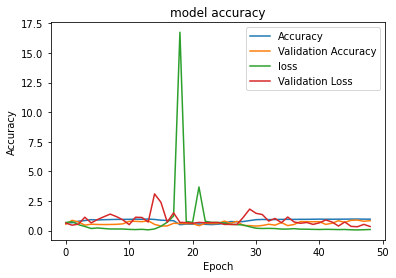

In [23]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

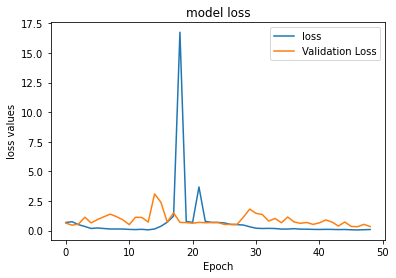

In [25]:
plt.plot(hist.history['loss'][1:])
plt.plot(hist.history['val_loss'][1:])
plt.title("model loss")
plt.ylabel("loss values")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

NEGATIVO


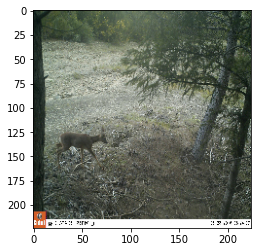

In [46]:
from keras.preprocessing import image
img = image.load_img("1.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("positivos.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("NEGATIVO")
else:
    print("POSITIVO")

In [48]:
traindata.class_indices

{'negativos': 0, 'positivos': 1}

In [49]:
output

array([[0.8301139 , 0.16988613]], dtype=float32)

In [61]:
print(output)

In [59]:
# load and iterate predictions
predict_data = ImageDataGenerator()
predictdata = predict_data.flow_from_directory(directory="predict", target_size=(224,224))

Found 34 images belonging to 1 classes.


In [63]:
pred=model.predict(predictdata)
print("done")

In [81]:
pred

array([[9.9518710e-01, 4.8128986e-03],
       [6.9958925e-01, 3.0041072e-01],
       [9.2164701e-01, 7.8353032e-02],
       [3.1788316e-14, 1.0000000e+00],
       [1.3861769e-15, 1.0000000e+00],
       [4.2354822e-14, 1.0000000e+00],
       [8.8796502e-01, 1.1203502e-01],
       [9.8007387e-01, 1.9926094e-02],
       [5.4245640e-29, 1.0000000e+00],
       [7.1516490e-01, 2.8483507e-01],
       [6.5914023e-01, 3.4085977e-01],
       [2.0670065e-14, 1.0000000e+00],
       [6.4380183e-15, 1.0000000e+00],
       [9.9885833e-01, 1.1416184e-03],
       [2.7557760e-14, 1.0000000e+00],
       [6.8457168e-01, 3.1542829e-01],
       [4.8884928e-14, 1.0000000e+00],
       [5.6531177e-17, 1.0000000e+00],
       [6.6413993e-01, 3.3586001e-01],
       [2.5604544e-02, 9.7439551e-01],
       [8.5502332e-01, 1.4497674e-01],
       [6.0594642e-01, 3.9405355e-01],
       [6.6166162e-14, 1.0000000e+00],
       [2.7629487e-26, 1.0000000e+00],
       [8.2337296e-01, 1.7662695e-01],
       [5.3826372e-14, 1.

In [83]:
predicted_class_indices
labels = (traindata.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
probs = [float(max(i)) for i in pred]

In [85]:
import numpy as np
import pandas as pd
predicted_class_indices=np.argmax(pred,axis=1)

labels = (traindata.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
probs = [float(max(i)) for i in pred]

filenames=predictdata.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions,
                      "Probability":probs,
                      })

In [86]:
results

,Filename,Predictions,Probability
0,predictions\11300077.JPG,negativos,0.995187
1,predictions\11300078.JPG,negativos,0.699589
2,predictions\11300079.JPG,negativos,0.921647
3,predictions\11300080.JPG,positivos,1.000000
4,predictions\11300081.JPG,positivos,1.000000
5,predictions\11300082.JPG,positivos,1.000000
6,predictions\11300083.JPG,negativos,0.887965
7,predictions\11300084.JPG,negativos,0.980074
8,predictions\11300085.JPG,positivos,1.000000
9,predictions\11300086.JPG,negativos,0.715165
